# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [46]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [47]:
import pandas as pd
from src.utils import load_data_from_google_drive
import seaborn as sns     
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [31]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [32]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


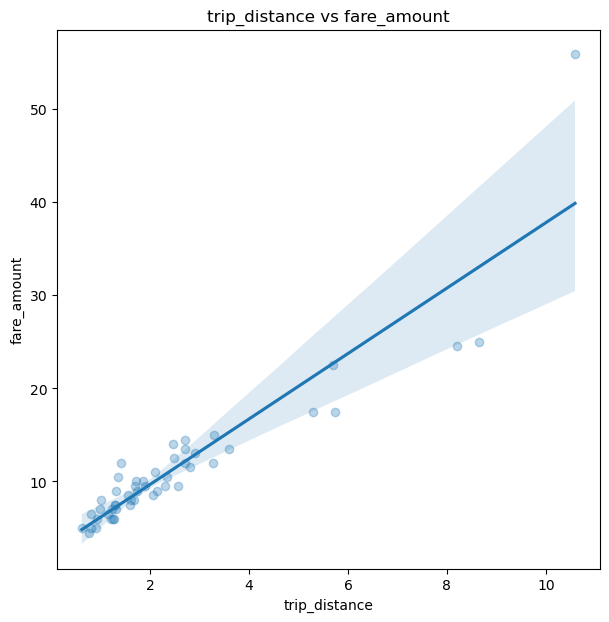

In [48]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

<Axes: title={'center': 'passenger_count for green taxis'}, xlabel='passenger_count', ylabel='count'>

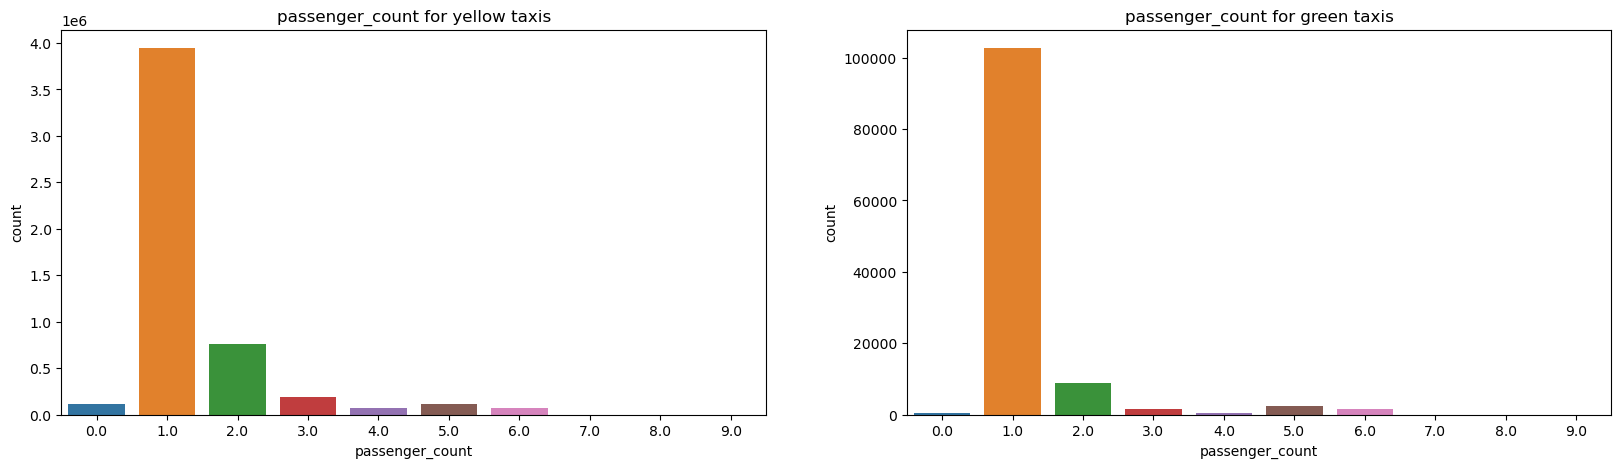

In [35]:
# Write your code
# We wish to view the distribution of distance,fares and passenger count - we use the describe() function
# since it will give us a brief overview of the distribution. The describe() function shows basic statistical 
# characteristics of each numerical feature (int64 and float64 types) To see what type the different columns
# have we use the info() function - IF one wishes to conduct describe() on non-numerical columns one simply
# needs to add the data type (Dtype in .info())
# for yellow taxis
#df_yellow.info()
df_yellow['trip_distance'].describe(); df_yellow['fare_amount'].describe(); df_yellow['passenger_count'].describe()
# for green taxis
#df_green.info() 
df_green['trip_distance'].describe(); df_green['fare_amount'].describe(); df_green['passenger_count'].describe()
# We now wish to look if there is any relationship or correlation between the 3 different columns
# We use the groupby() function to this end since it allows us to compare multiple columns - in our case
# we are going to compare them 2 and 2
# for yellow taxis
df_yellow.groupby('passenger_count')['fare_amount'].mean()
df_yellow.groupby('passenger_count')['trip_distance'].mean()
df_yellow.groupby('trip_distance')['fare_amount'].mean() 
# for green taxis
df_green.groupby('passenger_count')['fare_amount'].mean()
df_green.groupby('passenger_count')['trip_distance'].mean()
df_green.groupby('trip_distance')['fare_amount'].mean() 
# As expected due to the large amount of unique amount of trip_distance and fare_amount points points
df_green['passenger_count'].nunique(); df_green['fare_amount'].nunique(); df_green['trip_distance'].nunique()
# 10 ; 3670 ; 2349
# the groupby() function does not give a satisfying results therefore we use to use the .corr normally this 
# function findes the overall correlation between the entire dataframe however we are not interested in that
# therefore we limit it to the 2 columns of trip_distance and fare_amount
# for yellow taxis
df_yellow['passenger_count'].corr(df_yellow['fare_amount']) # 0.0013100090667864182
df_yellow['passenger_count'].corr(df_yellow['trip_distance']) # 0.021854477589814653
df_yellow['trip_distance'].corr(df_yellow['fare_amount']) # 0.0013100090667864182
# for green taxis
df_green['passenger_count'].corr(df_green['fare_amount']) # 0.0005573763506933325
df_green['passenger_count'].corr(df_green['trip_distance']) # -0.0008902537861230852
df_green['trip_distance'].corr(df_green['fare_amount']) # 0.020099460732981623
# We remember that linear correlation goes from +1 to -1; +1 being perfect correlation between the 2 columns/samples
# and 0 being no correlation between them; -1 being negativ correlation meaning.
# It can be observed that there is no meaningfull correlation between any of the 3 combinations
# We wish to observe rather or not these two taxis are "stealing" customers from each other
df_green['passenger_count'].corr(df_yellow['passenger_count']) # 0.004127193591813549
# there is no true correlation between them - therefore they have no direct compatition
# We wish to compare their pricing model per distance
# A new column is created for easy of access
df_yellow['tfare_dis_yellow'] = df_yellow['total_amount'] / df_yellow['trip_distance']
df_green['tfare_dis_green'] = df_green['total_amount'] / df_green['trip_distance']
df_yellow['tfare_dis_yellow'].corr(df_green['tfare_dis_green'])
# THere is no correlation 





In [36]:
# BRUG MIG!!! Sæt kode in her som du gerne vil have inviduelle outputs fra. - HUSK AT SLET MIG INDE I AFLEVERE
df_yellow['passenger_count'].value_counts()



1.0    3944723
2.0     763326
3.0     188228
0.0     114266
5.0     110394
4.0      76448
6.0      72700
8.0         18
7.0         12
9.0          6
Name: passenger_count, dtype: int64

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [37]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [38]:
# Write your code
# Load an empty map
# We wish to have a visual map of the distribution of the locations of the latitude & longitude for this purpose
# we use the keplerg1 package
from keplergl import KeplerGl
map_1 = KeplerGl(height=400, data={"data_1": df_zones},)
map_1
# The dots have the following values: 
#purple: 0.01 to 0.05; dark red: 0.05 to 0.06; red: 0.06 to 0.08; Orange: 0.08 to 0.11; 
# light Orange: 0.11 to 0.14; yellow: 0.14 to 0.43
print(df_zones.groupby('zone')['Shape_Leng'].mean())
# we wish to graph the distance per zones 
map_1



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
zone
Allerton/Pelham Gardens    0.084341
Alphabet City              0.043567
Arden Heights              0.092146
Arrochar/Fort Wadsworth    0.150491
Astoria                    0.107417
                             ...   
Woodlawn/Wakefield         0.126750
Woodside                   0.133514
World Trade Center         0.027120
Yorkville East             0.049064
Yorkville West             0.037017
Name: Shape_Leng, Length: 260, dtype: float64


KeplerGl(data={'data_1':      Shape_Leng  Shape_Area                     zone  LocationID  \
0      0.116357  …

In [39]:
# BRUG MIG!!! Sæt kode in her som du gerne vil have inviduelle outputs fra. - HUSK AT SLET MIG INDE I AFLEVERE

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [53]:
# Write your code
# In this code box only data is sorted into more accessable groups

# for yellow & green taxis 
df_yellow['pickup_day']=df_yellow['tpep_pickup_datetime'].dt.day_name() 
df_yellow['dropoff_day']=df_yellow['tpep_dropoff_datetime'].dt.day_name()
df_green['pickup_day']=df_green['lpep_pickup_datetime'].dt.day_name() 
df_green['dropoff_day']=df_green['lpep_dropoff_datetime'].dt.day_name()
# pickup_day & dropoff_daywhich will contain the name of the day on which the ride was taken.
df_yellow['pickup_day_no']=df_yellow['tpep_pickup_datetime'].dt.weekday
df_yellow['dropoff_day_no']=df_yellow['tpep_dropoff_datetime'].dt.weekday
df_green['pickup_day_no']=df_green['lpep_pickup_datetime'].dt.weekday
df_green['dropoff_day_no']=df_green['lpep_dropoff_datetime'].dt.weekday
# which will contain the day number instead of characters with Monday=0 and Sunday=6.
df_yellow['pickup_hour']=df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['dropoff_hour']=df_yellow['tpep_dropoff_datetime'].dt.hour
df_green['pickup_hour']=df_green['lpep_pickup_datetime'].dt.hour
df_green['dropoff_hour']=df_green['lpep_dropoff_datetime'].dt.hour
# with an hour of the day in the 24-hour format.
df_yellow['pickup_week']=df_yellow['tpep_pickup_datetime'].dt.isocalendar().week
df_yellow['dropoff_week']=df_yellow['tpep_dropoff_datetime'].dt.isocalendar().week
df_green['pickup_week']=df_green['lpep_pickup_datetime'].dt.isocalendar().week
df_green['dropoff_week']=df_green['lpep_dropoff_datetime'].dt.isocalendar().week
# with a weekly format




In [54]:
# We only use the "dropoff" parts since a pickup might end during another day
#  In this code box we use the before created new columns from the prior code box 
#time of the day in hour interval
df_yellow['dropoff_hour'].value_counts()
df_green['dropoff_hour'].value_counts()
#day of the week with names
df_yellow['dropoff_day'].value_counts()
df_green['dropoff_day'].value_counts()
# Analyzer of patterns
df_yellow.groupby('dropoff_day')['dropoff_hour'].mean()
df_green.groupby('dropoff_day')['dropoff_hour'].mean()

# Fare amount sorted by hours 
df_yellow.groupby('dropoff_hour')['fare_amount'].mean()
df_green.groupby('dropoff_hour')['fare_amount'].mean()
# Fare amount sorted by days
df_yellow.groupby('dropoff_day')['fare_amount'].mean()
df_green.groupby('dropoff_day')['fare_amount'].mean()
# Fare amount sorted by hours during the days
df_yellow.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean()
df_green.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean()
# we now wish to find what day has the hour with the highest average fare aswell as the general highest average
# hour and day
print("Yellow taxis has the highest average hour fare is hour",df_yellow.groupby('dropoff_hour')['fare_amount'].mean().idxmax() ) 
print("Green taxis has the highest average hour fare is hour",df_green.groupby('dropoff_hour')['fare_amount'].mean().idxmax() )
print("Yellow taxis has the highest average fare during",df_yellow.groupby('dropoff_day')['fare_amount'].mean().idxmax() ) 
print("Green taxis has the highest average fare during",df_green.groupby('dropoff_day')['fare_amount'].mean().idxmax() ) 
print("Yellow taxis has the highest average fare during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmax() ) 
print("Green taxis has the highest average fare during",df_green.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmax() ) 
print("Yellow taxis has the lowest average hour fare is hour",df_yellow.groupby('dropoff_hour')['fare_amount'].mean().idxmin() ) 
print("Green taxis has the lowest average hour fare is hour",df_green.groupby('dropoff_hour')['fare_amount'].mean().idxmin() )
print("Yellow taxis has the lowest average fare during",df_yellow.groupby('dropoff_day')['fare_amount'].mean().idxmin() ) 
print("Green taxis has the lowest average fare during",df_green.groupby('dropoff_day')['fare_amount'].mean().idxmin() ) 
print("Yellow taxis has the lowest average fare during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmin() ) 
print("Green taxis has the lowest average fare during",df_green.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmin() ) 
print("Viewing distance below")
print("Yellow taxis has the highest average hour distance is hour",df_yellow.groupby('dropoff_hour')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the highest average hour distance is hour",df_green.groupby('dropoff_hour')['trip_distance'].mean().idxmax() )
print("Yellow taxis has the highest average distance during",df_yellow.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the highest average distance during",df_green.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Yellow taxis has the highest average distance during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 
print("Green taxis has the highest average distance during",df_green.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 
print("Yellow taxis has the lowest average hour distance is hour",df_yellow.groupby('dropoff_hour')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the lowest average hour distance is hour",df_green.groupby('dropoff_hour')['trip_distance'].mean().idxmax() )
print("Yellow taxis has the lowest average distance during",df_yellow.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the lowest average distance during",df_green.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Yellow taxis has the lowest average distance during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 
print("Green taxis has the lowest average distance during",df_green.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 

# We see that the day with the both taxis have high fares during the night but low fares during morning and midday


Yellow taxis has the highest average hour fare is hour 5
Green taxis has the highest average hour fare is hour 5
Yellow taxis has the highest average fare during Sunday
Green taxis has the highest average fare during Saturday
Yellow taxis has the highest average fare during ('Friday', 11)
Green taxis has the highest average fare during ('Sunday', 5)
Yellow taxis has the lowest average hour fare is hour 12
Green taxis has the lowest average hour fare is hour 7
Yellow taxis has the lowest average fare during Saturday
Green taxis has the lowest average fare during Monday
Yellow taxis has the lowest average fare during ('Saturday', 11)
Green taxis has the lowest average fare during ('Thursday', 7)
Viewing distance below
Yellow taxis has the highest average hour distance is hour 5
Green taxis has the highest average hour distance is hour 7
Yellow taxis has the highest average distance during Saturday
Green taxis has the highest average distance during Sunday
Yellow taxis has the highest ave

We see that thursday to saturday are the busiest days for both companies and sunday being the least busy
We see that 1-6 are the least busiest days for both companies and 15-18 being the busiest


KeyboardInterrupt: 

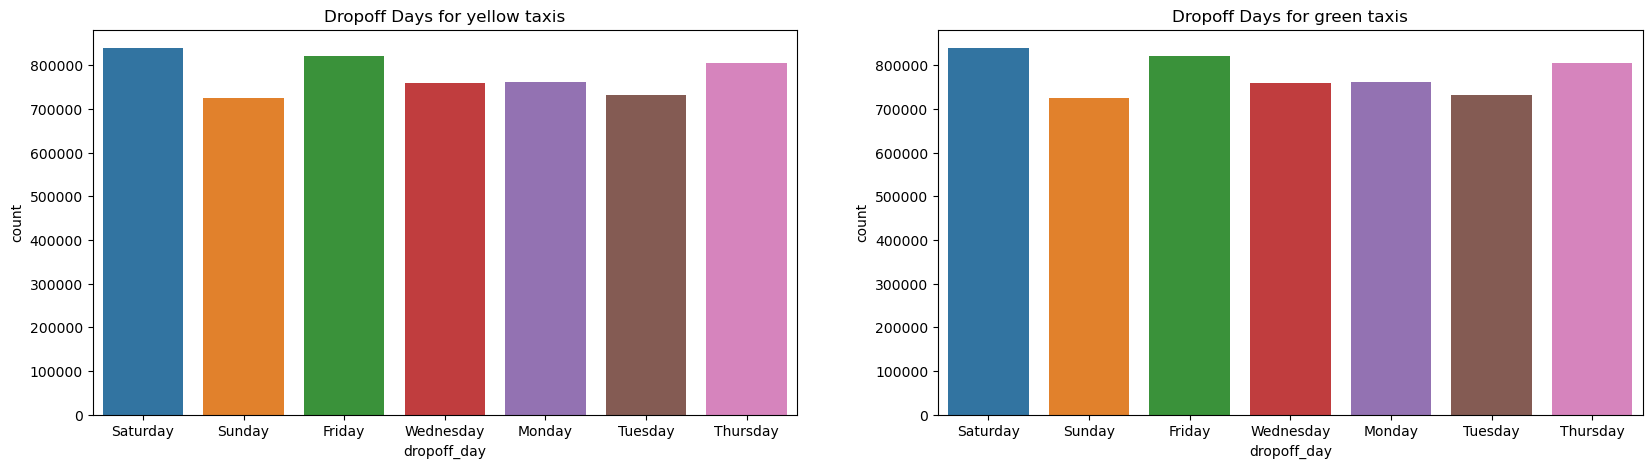

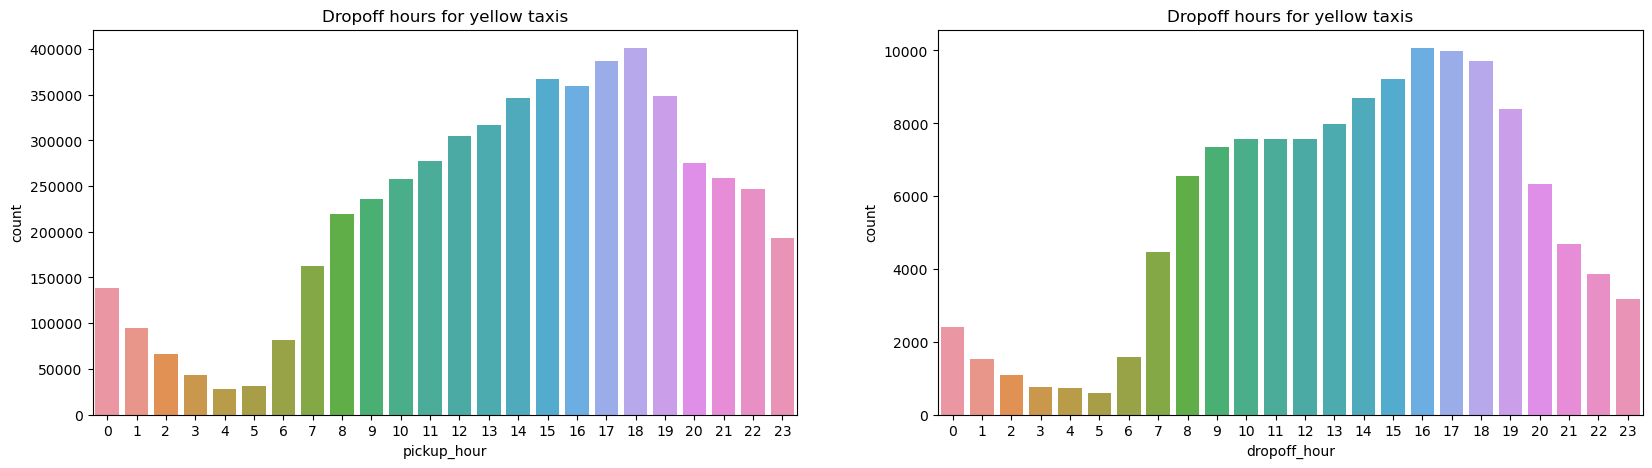

In [45]:
# We wish to have som visual comparison of the distribution between the taxis
# We create a figure that contains 2 plots 1 green 1 yellow
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
# We create the plots
ax1.set_title('Dropoff Days for yellow taxis')
ax=sns.countplot(x="dropoff_day",data=df_yellow,ax=ax1)
ax2.set_title('Dropoff Days for green taxis')
ax=sns.countplot(x="dropoff_day",data=df_yellow,ax=ax2)
print("We see that thursday to saturday are the busiest days for both companies and sunday being the least busy")

# we wish to create a figure that cointains the distribution of the taxis sortedd by hours
figure,(HejLærke,ax4)=plt.subplots(ncols=2,figsize=(20,5))
HejLærke.set_title('Dropoff hours for yellow taxis')
ax=sns.countplot(x="pickup_hour",data=df_yellow,ax=HejLærke)
ax4.set_title('Dropoff hours for yellow taxis')
ax=sns.countplot(x="dropoff_hour",data=df_green,ax=ax4)
print("We see that 1-6 are the least busiest days for both companies and 15-18 being the busiest")

# We wish to visualize the relationship between trip distance and amount of passengers
#sns.catplot(y='trip_distance',x='passenger_count',data=df_yellow,kind="strip")
# takes a while to load my record is 3min

sns.lineplot(x='dropoff_hour',y='trip_distance',data=df_yellow)


In [ ]:
# BRUG MIG!!! Sæt kode in her som du gerne vil have inviduelle outputs fra. - HUSK AT SLET MIG INDE I AFLEVERE
#df_yellow.columns.tolist()


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [ ]:
# Write your code
df_yellow.columns.tolist()


NameError: name 'df_yellow' is not defined

In [ ]:
# TEST I MIG
con=df_yellow['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

KeyboardInterrupt: 

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.